# Import Libraries

In [3]:
'''Main'''
import numpy as np
import pandas as pd
import os

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

'''Data Prep'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Data Preparation

In [4]:
# Acquire Data
current_path = os.getcwd()
#print(current_path)
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
print(file)
data = pd.read_csv(current_path + file)

\datasets\credit_card_data\credit_card.csv


In [5]:
# Explore Data
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#data.describe()

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
print("Number of fraudulent transactions:", data['Class'].sum())
#print(data[data['Class']==1].shape[0])
print(data['Class'].value_counts())

Number of fraudulent transactions: 492
Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
nanCounter = np.isnan(data).sum()

In [12]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [29]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
# Generate feature matrix and labels array
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [15]:
#dataX.describe()
dataX.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

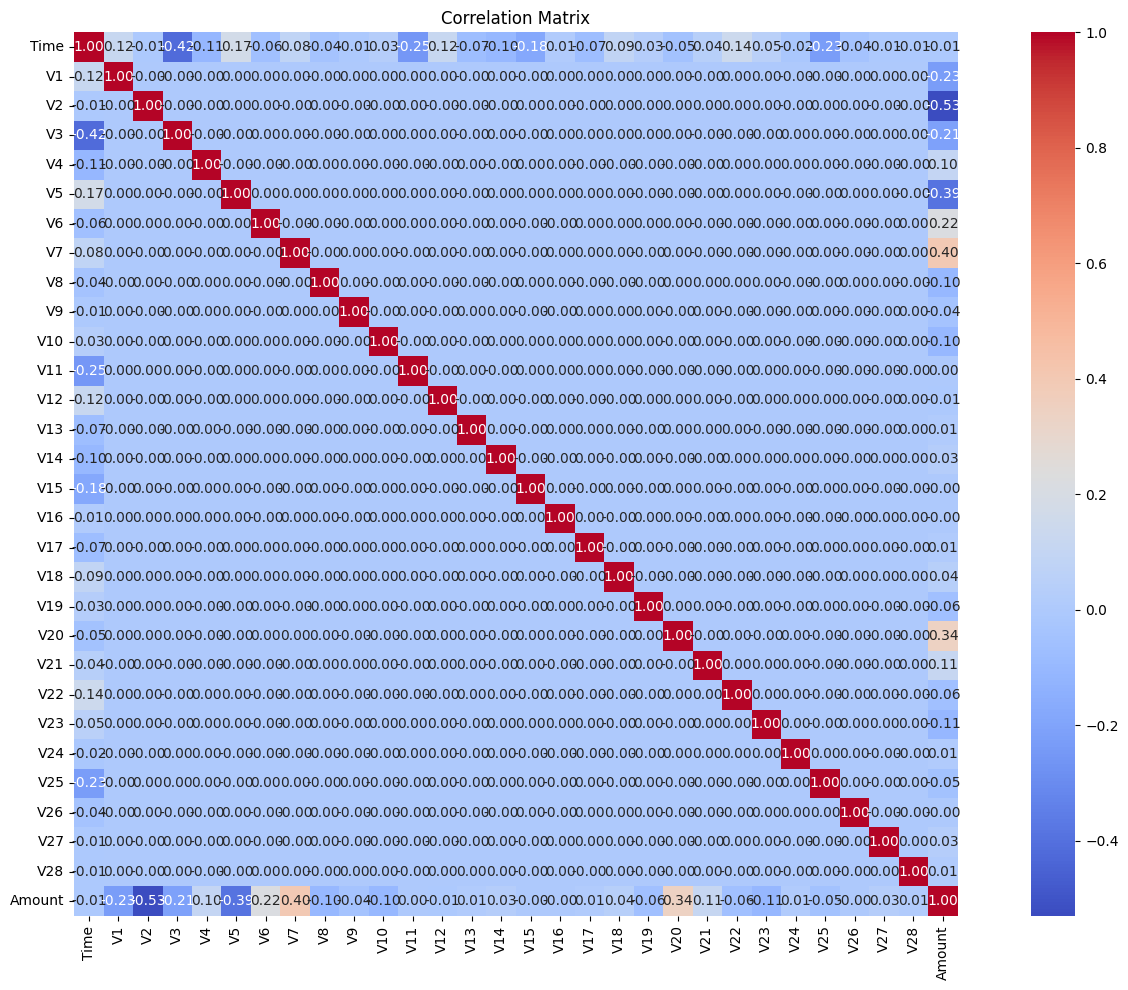

In [17]:
#correlationMatrix.head()
# Convert strings to floats if needed (from object dtype)
newcorrelationMatrix = correlationMatrix.astype(float)

# Step 2: Plot using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(newcorrelationMatrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [18]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

C:\Users\meisa\AppData\Local\Temp\ipykernel_33636\4104198586.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'],sort=True).sort_index()


Text(0, 0.5, 'Frequency Percentage')

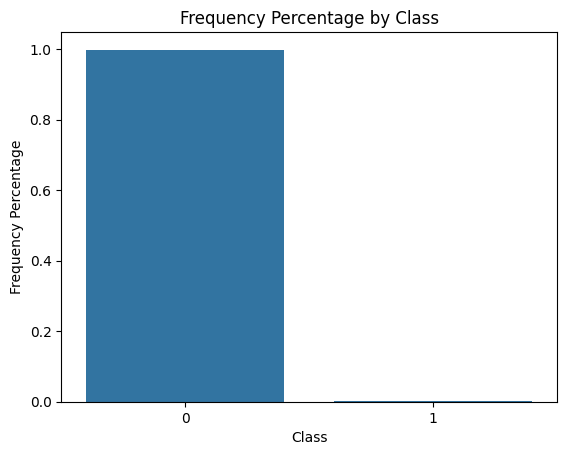

In [19]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=[tuple(count_classes/len(data))[0],tuple(count_classes/len(data))[1]])
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

# Model Preparation

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [21]:
len(X_train)

190820

In [22]:
len(X_test)

93987

In [23]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [24]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [25]:
# Feature scaling
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [26]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [27]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

In [29]:
scalingFactors.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,0.000169,-0.001847,-0.002083,0.000909,0.002961,0.002817,-0.000048,-0.002589,-0.000516,0.000787,...,-0.000925,0.001924,-0.000187,0.001501,-0.000785,0.000352,-0.000369,0.000434,0.000083,88.324359
StDev,1.965201,1.656922,1.513847,1.414958,1.385615,1.337316,1.244564,1.216633,1.097482,1.085226,...,0.769595,0.752358,0.727151,0.626533,0.606504,0.522020,0.481376,0.402544,0.340144,246.692699


In [30]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

# Logistic Regression

In [31]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C,
            class_weight=class_weight, random_state=random_state,
                            solver=solver, n_jobs=n_jobs)

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

C:\Users\meisa\AppData\Local\Temp\ipykernel_33636\2035348296.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ,y_train.ravel()):


Training Log Loss:  0.10963352012369929
CV Log Loss:  0.10881323081791784
Training Log Loss:  0.10468830602965924
CV Log Loss:  0.10407136324431582
Training Log Loss:  0.11562649972038581
CV Log Loss:  0.11802882119184001
Training Log Loss:  0.11566784324479662
CV Log Loss:  0.11828348157814908
Training Log Loss:  0.09733649941418145
CV Log Loss:  0.09727536678079192
Logistic Regression Log Loss:  0.10929445272260294


In [33]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [42]:
predictionsBasedOnKFoldsLogisticRegression.head()

,trueLabel,prediction
142087,0,0.000816
165168,0,0.031841
235908,0,0.161194
148255,0,0.006836
145672,0,0.036978


In [34]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [35]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

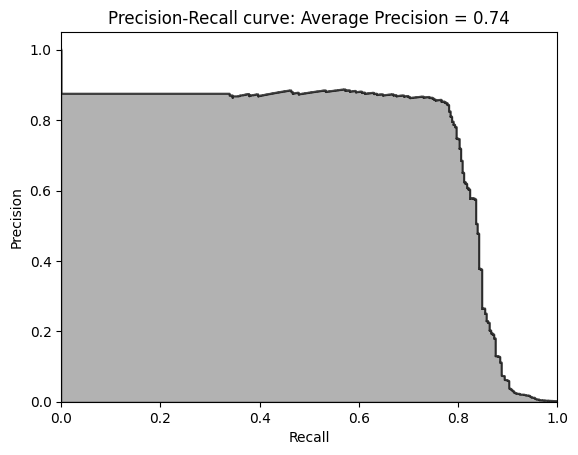

In [36]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [37]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [38]:
areaUnderROC = auc(fpr, tpr)

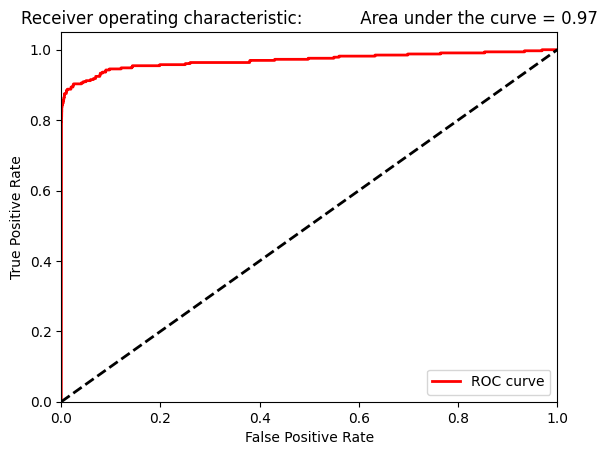

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Random Forests

In [43]:
n_estimators = 10
#max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        #max_features=max_features, max_depth=max_depth,
        max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [44]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

C:\Users\meisa\AppData\Local\Temp\ipykernel_33636\83228059.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel()):


Training Log Loss:  0.0004566021382939061
CV Log Loss:  0.00944518430049733
Training Log Loss:  0.00040829452152382496
CV Log Loss:  0.013138698546690857
Training Log Loss:  0.0003885344143032627
CV Log Loss:  0.0112432800420569
Training Log Loss:  0.0003910895192488638
CV Log Loss:  0.0068545818676937235
Training Log Loss:  0.00042118560357489436
CV Log Loss:  0.014015890608317224
Random Forests Log Loss:  0.010939527073051207


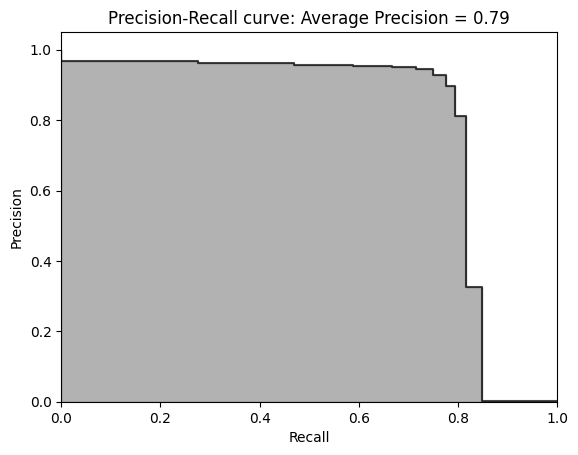

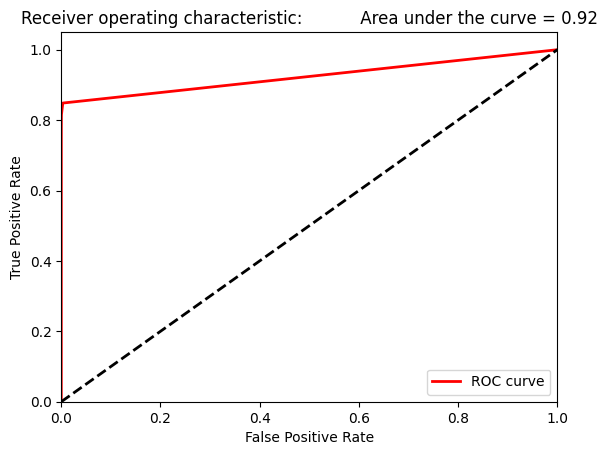

In [45]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# XGBoost

To improve the user experience, I have commented out code blocks related to XGBoost. To uncomment the code blocks, highlight the code and use the "CTRL" + "/" key combination.

In [ ]:
# params_xGB = {
#     'nthread':16, #number of cores
#     'learning rate': 0.3, #range 0 to 1, default 0.3
#     'gamma': 0, #range 0 to infinity, default 0 
#         # increase to reduce complexity (increase bias, reduce variance)
#     'max_depth': 6, #range 1 to infinity, default 6
#     'min_child_weight': 1, #range 0 to infinity, default 1
#     'max_delta_step': 0, #range 0 to infinity, default 0
#     'subsample': 1.0, #range 0 to 1, default 1
#         # subsample ratio of the training examples
#     'colsample_bytree': 1.0, #range 0 to 1, default 1 
#         # subsample ratio of features
#     'objective':'binary:logistic',
#     'num_class':1,
#     'eval_metric':'logloss',
#     'seed':2018,
#     'silent':1
# }

In [ ]:
# trainingScores = []
# cvScores = []
# predictionsBasedOnKFolds = pd.DataFrame(data=[],
#                                     index=y_train.index,columns=['prediction'])

# for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
#                                           y_train.ravel()):
#     X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
#         X_train.iloc[cv_index,:]
#     y_train_fold, y_cv_fold = y_train.iloc[train_index], \
#         y_train.iloc[cv_index]
    
#     dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
#     dCV = xgb.DMatrix(data=X_cv_fold)
    
#     bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
#                  nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
#     best_rounds = np.argmin(bst['test-logloss-mean'])
#     bst = xgb.train(params_xGB, dtrain, best_rounds)
    
#     loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
#     trainingScores.append(loglossTraining)
    
#     predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
#         bst.predict(dCV)
#     loglossCV = log_loss(y_cv_fold, \
#         predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
#     cvScores.append(loglossCV)
    
#     print('Training Log Loss: ', loglossTraining)
#     print('CV Log Loss: ', loglossCV)
    
# loglossXGBoostGradientBoosting = \
#     log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
# print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

In [ ]:
# preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
# preds.columns = ['trueLabel','prediction']
# predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

# precision, recall, thresholds = \
#     precision_recall_curve(preds['trueLabel'],preds['prediction'])
# average_precision = \
#     average_precision_score(preds['trueLabel'],preds['prediction'])

# plt.step(recall, precision, color='k', alpha=0.7, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

# plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
#           average_precision))

# fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
# areaUnderROC = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic: \
#         Area under the curve = {0:0.2f}'.format(areaUnderROC))
# plt.legend(loc="lower right")
# plt.show()

# LightGBM

In [46]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [48]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, callbacks=[lgb.early_stopping(stopping_rounds=200)])
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

C:\Users\meisa\AppData\Local\Temp\ipykernel_33636\1126574356.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train.ravel()):


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[981]	valid_0's binary_logloss: 0.00256093
Training Log Loss:  0.00034399803008070375
CV Log Loss:  0.0025609306206311284
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[717]	valid_0's binary_logloss: 0.00293865
Training Log Loss:  0.0004739539976754695
CV Log Loss:  0.002938650495951089
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[753]	valid_0's binary_logloss: 0.00222632
Training Log Loss:  0.0005571874706999705
CV Log Loss:  0.0022263175181220334
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[820]	valid_0's binary_logloss: 0.00264901
Training Log Loss:  0.00047655937349607455
CV Log Loss:  0.0026490126768537797
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[567]	valid_0's binary_logloss

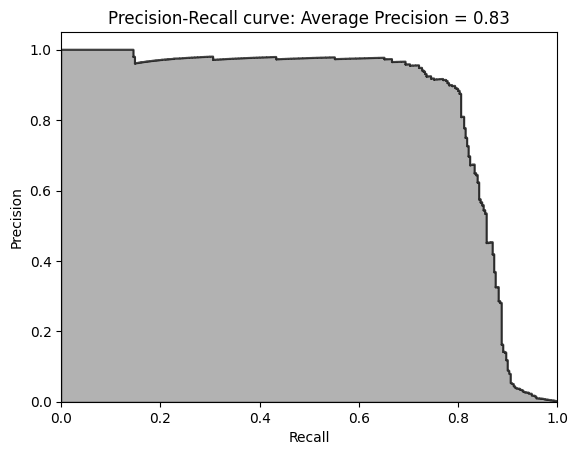

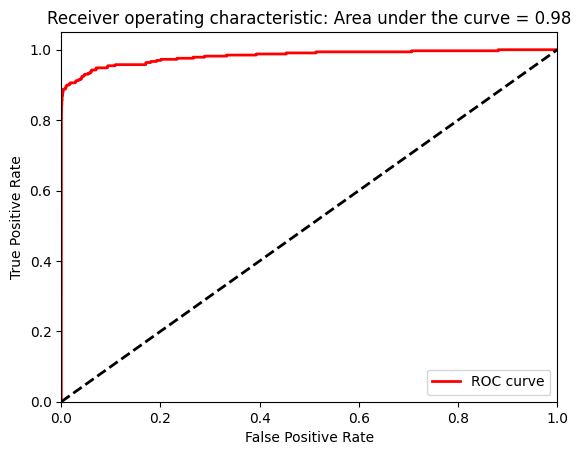

In [49]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Test Set Evaluation

In [50]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [51]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [ ]:
# predictionsTestSetXGBoostGradientBoosting = \
#     pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
# dtest = xgb.DMatrix(data=X_test)
# predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
#     bst.predict(dtest)
# logLossTestSetXGBoostGradientBoosting = \
#     log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [52]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [53]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
# print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
#           logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.09714389345366245
Log Loss of Random Forests on Test Set:  0.00938085242118647
Log Loss of LightGBM Gradient Boosting on Test Set:  0.0025167825399268085


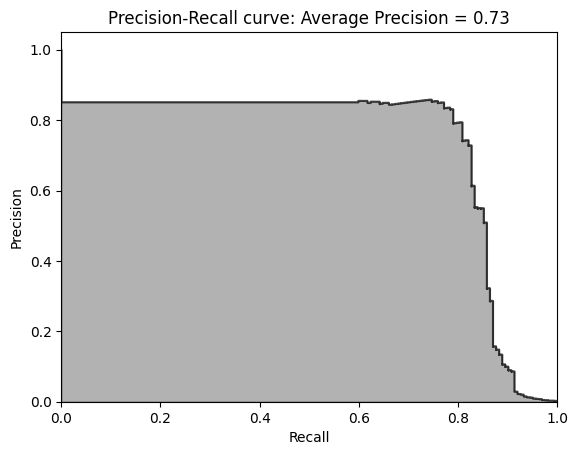

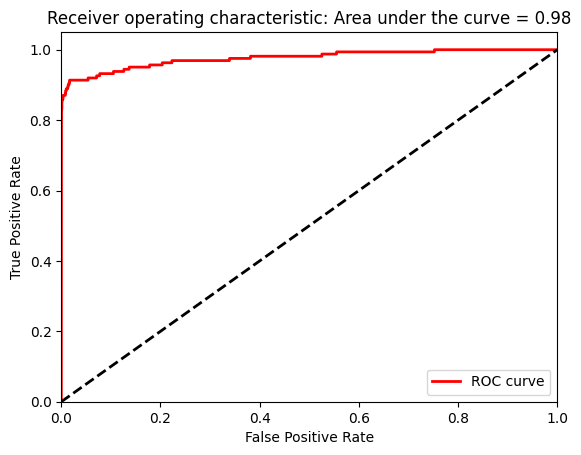

In [54]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

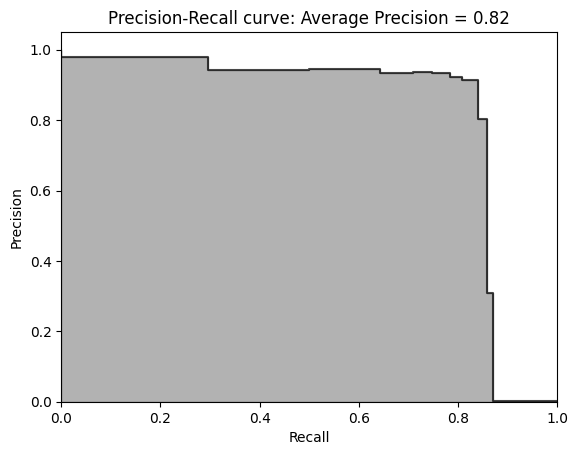

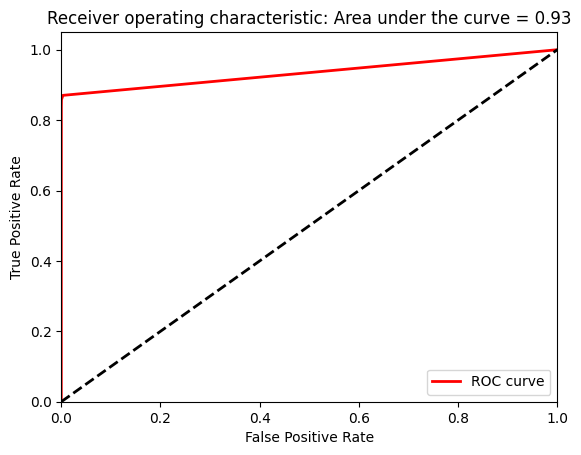

In [55]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [56]:
# precision, recall, thresholds = \
#     precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
# average_precision = \
#     average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

# plt.step(recall, precision, color='k', alpha=0.7, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

# plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
#           average_precision))

# fpr, tpr, thresholds = \
#     roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
# areaUnderROC = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic: \
# Area under the curve = {0:0.2f}'.format(areaUnderROC))
# plt.legend(loc="lower right")
# plt.show()

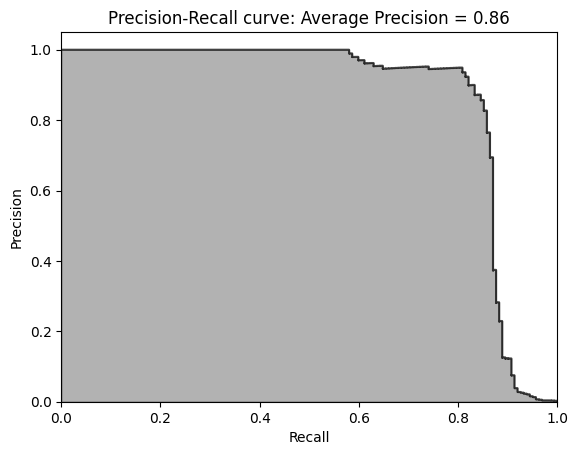

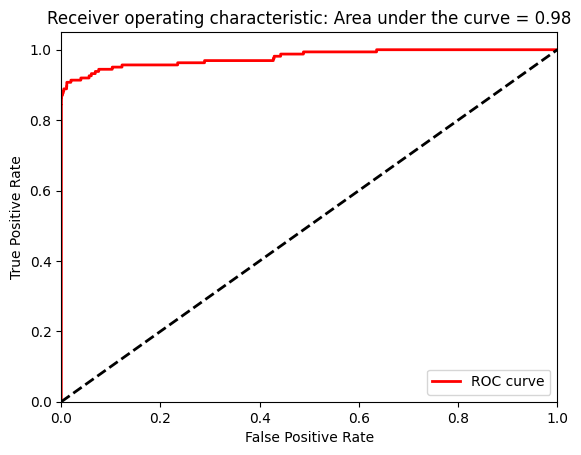

In [57]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Ensemble

In [58]:
# Without XGBoost
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsLightGBM']

# predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
# predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
#     predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
#     how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
#     .astype(float),how='left',rsuffix="2").join( \
#     predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="3").join( \
#     predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
#     how='left',rsuffix="4")
# predictionsBasedOnKFoldsFourModels.columns = \
#     ['predsLR','predsRF','predsXGB','predsLightGBM']

In [60]:
predictionsBasedOnKFoldsFourModels.head()

,predsLR,predsRF,predsLightGBM
142087,0.000816,0.0,0.000014
165168,0.031841,0.0,0.000064
235908,0.161194,0.0,0.000049
148255,0.006836,0.0,0.000065
145672,0.036978,0.0,0.000071


In [ ]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels, left_index=True,right_index=True)

In [ ]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [ ]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00575886
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00567831
[3]	valid_0's binary_logloss: 0.00560729
[4]	valid_0's binary_logloss: 0.00554732
[5]	valid_0's binary_logloss: 0.00549666
[6]	valid_0's binary_logloss: 0.00543655
[7]	valid_0's binary_logloss: 0.00538611
[8]	valid_0's binary_logloss: 0.00533869
[9]	valid_0's binary_logloss: 0.00528248
[10]	valid_0's binary_logloss: 0.00524013
[11]	valid_0's binary_logloss: 0.00519067
[12]	valid_0's binary_logloss: 0.00514459
[13]	valid_0's binary_logloss: 0.00509982
[14]	valid_0's binary_logloss: 0.00506104
[15]	valid_0's binary_logloss: 0.00501864
[16]	valid_0's binary_logloss: 0.00497562
[17]	valid_0's binary_logloss: 0.00493932
[18]	valid_0's binary_logloss: 0.00490112
[19]	valid_0's binary_logloss: 0.00486511
[20]	valid_0's binary_logloss: 0.00482876
[21]	valid_0's binary_logloss: 0.004794
[22]	valid_0's binary_logloss: 0.00475979
[23]	valid_0's binary_lo

In [ ]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [127, 118, 64, 129, 165, 61, 68, 119, 180, 91, 182, 99, 168, 169, 362, 43, 177, 37, 67, 323, 95, 86, 146, 42, 171, 213, 248, 95, 110, 438, 186, 152, 427]


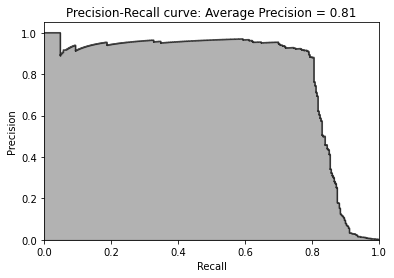

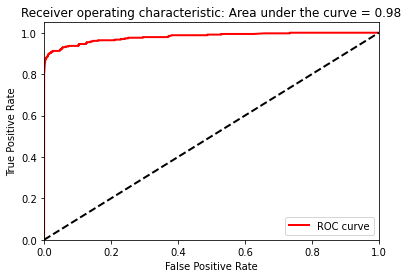

In [ ]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

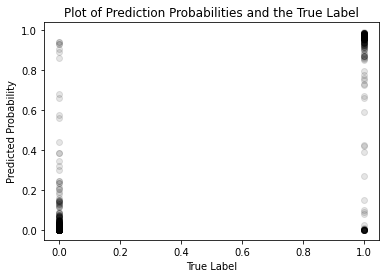

In [ ]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

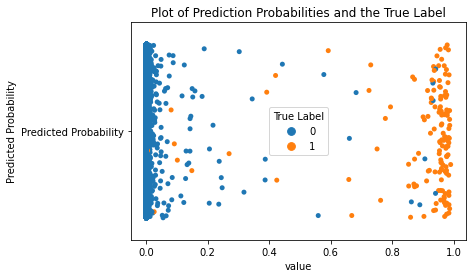

In [ ]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [ ]:
# Pipeline for New Data
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

# Conclusion